# Project: Exploratory Data Analysis - wine quality

* Data Set Information: The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
* Source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### 1. Import libraries

In [1]:
#interactive graphics below each code cell
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Dataset upload

In [3]:
#Load Dataset from red and white wine:
df_red_wine = pd.read_csv('./data/winequality-red.csv',delimiter=';')
df_white_wine = pd.read_csv('./data/winequality-white.csv', delimiter=';')

In [4]:
#Show the content of both DataFrames:
df_red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_white_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#DataFrame Sizes:
print('Size df_red_wine:',df_red_wine.shape)
print('Size df_white_wine:',df_white_wine.shape)

Size df_red_wine: (1599, 12)
Size df_white_wine: (4898, 12)


### 3.Join both DataFrames 

In [7]:
#Include a feature called "category" to each dataframe, and then merge them into a single dataframe:
df_red_wine['category'] = 'red_wine'
df_white_wine['category'] = 'white_wine'
df_wine = pd.concat(objs=[df_red_wine, df_white_wine], axis=0, join='outer', ignore_index=True)

In [8]:
#Show Final DataFrame and dimensions:
print('Size df_wine: ',df_wine.shape)
df_wine.sample(10)

Size df_wine:  (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
3072,7.0,0.20,0.49,5.9,0.038,39.0,128.0,0.99380,3.21,0.48,10.8,6,white_wine
568,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,6,red_wine
6172,6.8,0.32,0.23,3.3,0.026,31.0,99.0,0.98960,3.10,0.40,12.4,6,white_wine
582,11.7,0.49,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2,5,red_wine
450,11.9,0.39,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,6,red_wine
2349,7.2,0.29,0.40,7.6,0.024,56.0,177.0,0.99280,3.04,0.32,11.5,6,white_wine
1340,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6,red_wine
5586,7.3,0.23,0.41,14.6,0.048,73.0,223.0,0.99863,3.16,0.71,9.4,6,white_wine
4363,7.9,0.16,0.30,7.4,0.050,58.0,152.0,0.99612,3.12,0.37,9.5,6,white_wine
2786,6.6,0.21,0.38,2.2,0.026,40.0,104.0,0.99140,3.25,0.40,11.1,8,white_wine


### 4.Data exploration

In [9]:
#Check for null values:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
category                0
dtype: int64

**OBS:** 
* There are not null values.

In [10]:
#Check for data Types:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**OBS:** 
* All the variables of "df_wine" are numeric types (int64 and float64). Only 'category' is type categorical (object)

In [11]:
#Count unique values for variable 'category':
df_wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

**OBS:**

* From DataFrame, Most of the wines are between High Quality (9,8,7) and Intermediate Quality (6,5). 
* Wines of low quality (4,3) are not well-represented in this DataFrame. Probably customers prefer some another cheaper drink.
* There is no lower quality than 3.

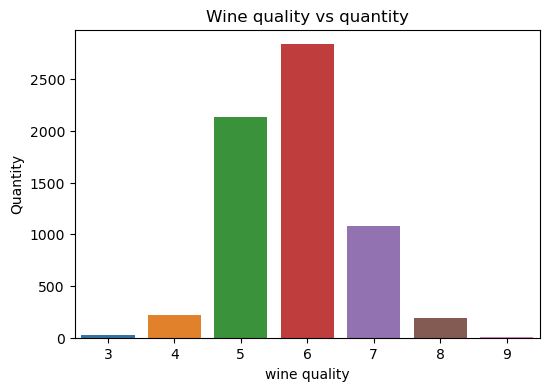

In [12]:
#Bar plot for wine quality:
fig = plt.figure(figsize = (6, 4))
sns.barplot(x= df_wine['quality'].value_counts().index, y=df_wine['quality'].value_counts())
plt.xlabel("wine quality")
plt.ylabel("Quantity")
plt.title("Wine quality vs quantity")
plt.show()

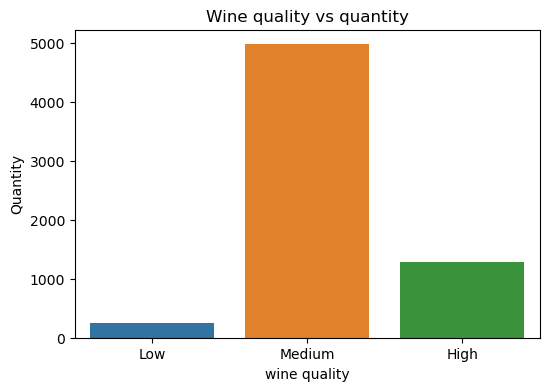

In [13]:
#Group by Low, medium and high quality and plot:
df_wine['quality_cat'] = np.select([df_wine.quality<=4,df_wine.quality>=7 ], ['Low','High'], default='Medium')

fig = plt.figure(figsize = (6, 4))
sns.barplot(x= df_wine['quality_cat'].value_counts().index, y=df_wine['quality_cat'].value_counts(), order=['Low','Medium','High'])
plt.xlabel("wine quality")
plt.ylabel("Quantity")
plt.title("Wine quality vs quantity")
plt.show()

**OBS:**
*  As we can see, previous observations were correct. Most of the wine produced is of Medium and High quality. 

### 5.Check Outliers

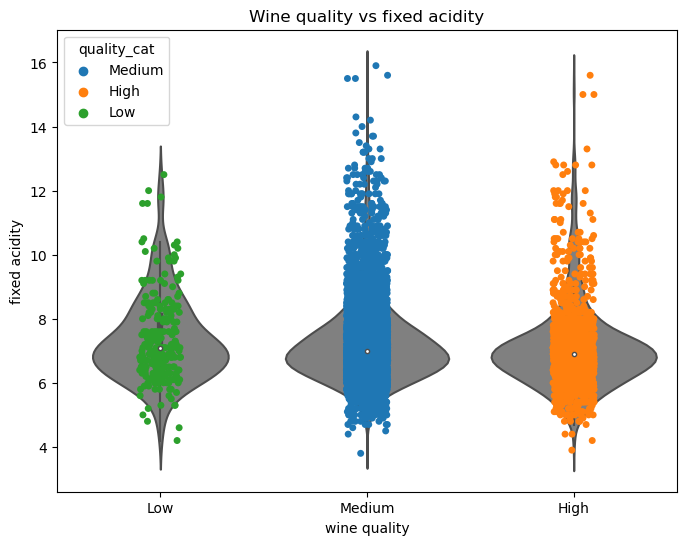

In [14]:
#Violin plot for outliers "Wine quality vs fixed acidity":
fig = plt.figure(figsize = (8, 6))
sns.stripplot(data=df_wine, x='quality_cat', y='fixed acidity', hue='quality_cat',order=['Low','Medium','High'])
sns.violinplot(data=df_wine, x='quality_cat', y='fixed acidity', order=['Low','Medium','High'], color='gray')
plt.xlabel("wine quality")
plt.ylabel("fixed acidity")
plt.title("Wine quality vs fixed acidity")
plt.show()

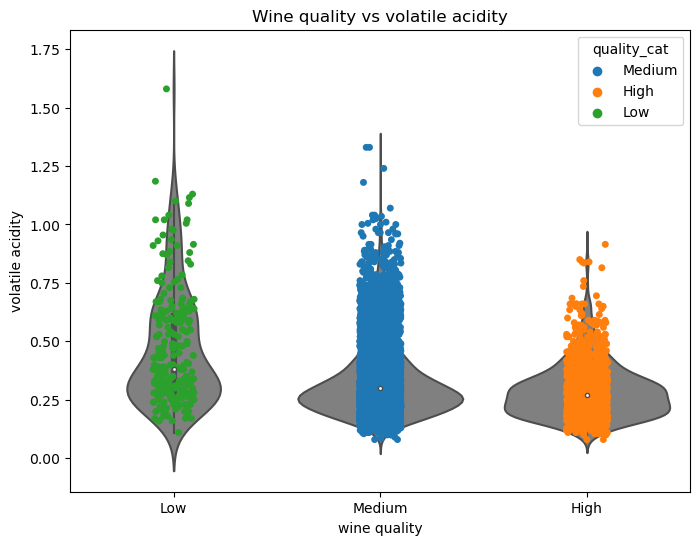

In [15]:
#Violin plot for outliers "Wine quality vs volatile acidity":
fig = plt.figure(figsize = (8, 6))
sns.stripplot(data=df_wine, x='quality_cat', y='volatile acidity', hue='quality_cat',order=['Low','Medium','High'])
sns.violinplot(data=df_wine, x='quality_cat', y='volatile acidity', order=['Low','Medium','High'], color='gray')
plt.xlabel("wine quality")
plt.ylabel("volatile acidity")
plt.title("Wine quality vs volatile acidity")
plt.show()

**OBS:**
* Comparing "Wine Quality" vs "fixed acidity" and "volatile acidity", ther are many outliers.  
* It is not recommended to remove the outliers, it can influence the final result. It is advisable to apply statistical techniques to mitigate these outliers.

### 6.Correlation analysis

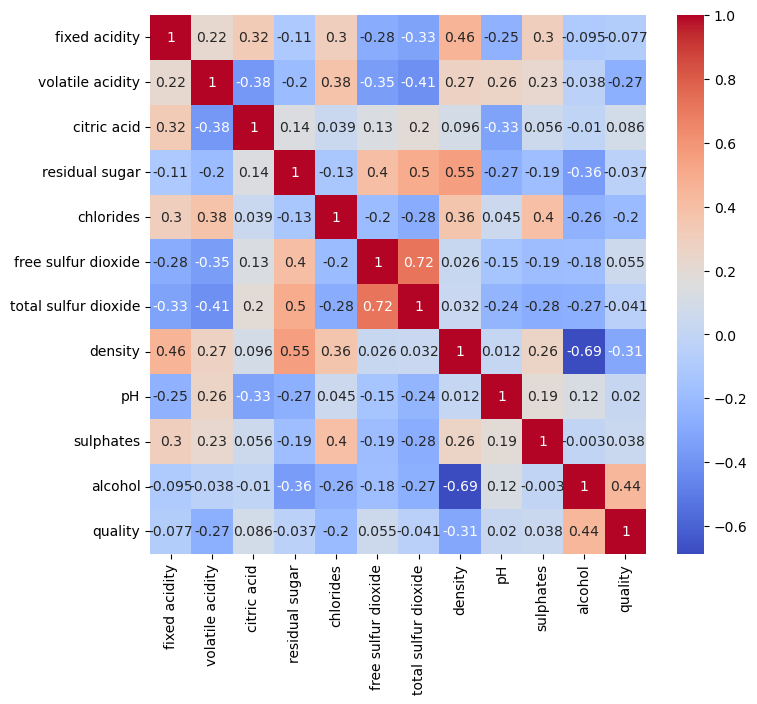

In [16]:
#Heatmap for correlation:
fig = plt.figure(figsize = (8,7))
sns.heatmap(data=df_wine.corr(numeric_only=True),annot=True, cmap='coolwarm' )
plt.show()


In [17]:
#Show all correlation with variable"quality":
df_wine.corr(numeric_only=True)[['quality']].sort_values(by='quality',ascending=False).style.background_gradient(cmap = 'coolwarm')

,quality
quality,1.000000
alcohol,0.444319
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743
chlorides,-0.200666


**OBS:** 

* Variables "alcohol" and "citric acid" have a positive correlation with variable target "quality".
* Variables "density", "volatile acidity" and "chlorides"  have a negative correlation with variable target "quality".


<Figure size 800x800 with 0 Axes>

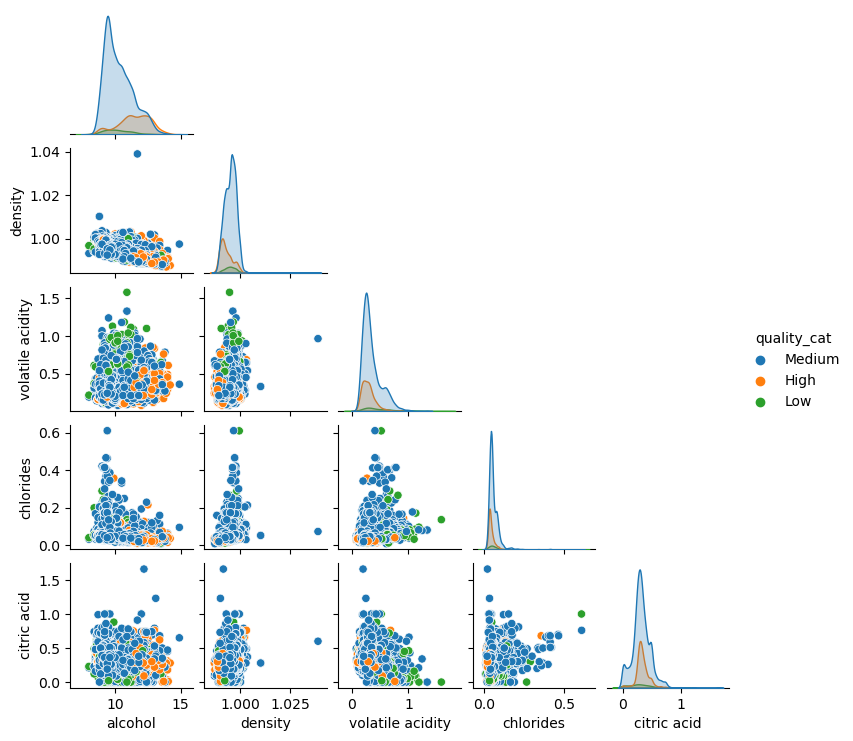

In [18]:
#Pairplot
fig = plt.figure(figsize = (8, 8))
sns.pairplot(data= df_wine[['alcohol','density','volatile acidity','chlorides','quality_cat','citric acid']],
                    height=1.5,
                    corner=True, 
                    hue='quality_cat',
                    kind='scatter',
                    palette='tab10')
plt.show()

**OBS:**
* There are no corelation between variables "alcohol","citric acid","density","volatile acidity" and "chlorides".

### 7.Final Results

**Positive Correlation with "quality"**

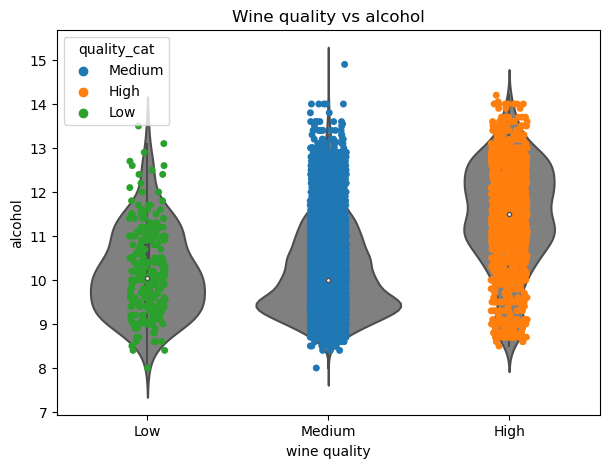

In [19]:
#Violin plot for positive correlation "Wine quality vs alcohol":
fig = plt.figure(figsize = (7, 5))
sns.stripplot(data=df_wine, x='quality_cat', y='alcohol', hue='quality_cat',order=['Low','Medium','High'])
sns.violinplot(data=df_wine, x='quality_cat', y='alcohol', order=['Low','Medium','High'], color='gray')
plt.xlabel("wine quality")
plt.ylabel("alcohol")
plt.title("Wine quality vs alcohol")
plt.show()

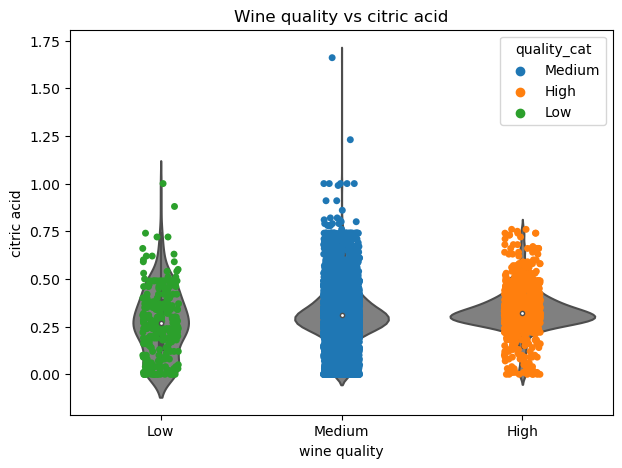

In [20]:
#Violin plot for positive correlation "Wine quality vs citric acid":
fig = plt.figure(figsize = (7, 5))
sns.stripplot(data=df_wine, x='quality_cat', y='citric acid', hue='quality_cat',order=['Low','Medium','High'])
sns.violinplot(data=df_wine, x='quality_cat', y='citric acid', order=['Low','Medium','High'], color='gray')
plt.xlabel("wine quality")
plt.ylabel("citric acid")
plt.title("Wine quality vs citric acid")
plt.show()

**Negative Correlation with "quality"**

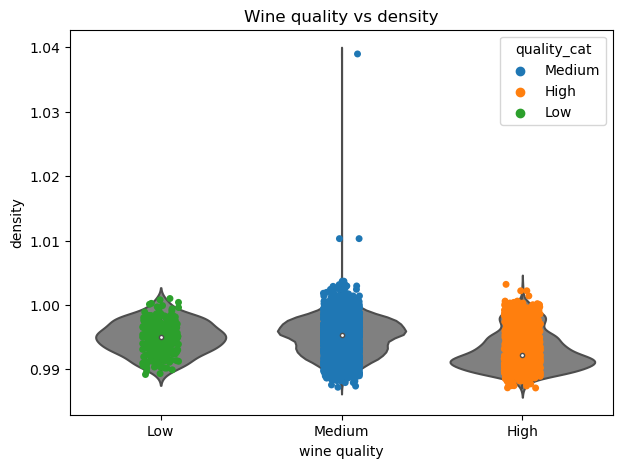

In [21]:
#Violin plot for negative correlation "Wine quality vs density":
fig = plt.figure(figsize = (7, 5))
sns.stripplot(data=df_wine, x='quality_cat', y='density', hue='quality_cat',order=['Low','Medium','High'])
sns.violinplot(data=df_wine, x='quality_cat', y='density', order=['Low','Medium','High'], color='gray')
plt.xlabel("wine quality")
plt.ylabel("density")
plt.title("Wine quality vs density")
plt.show()

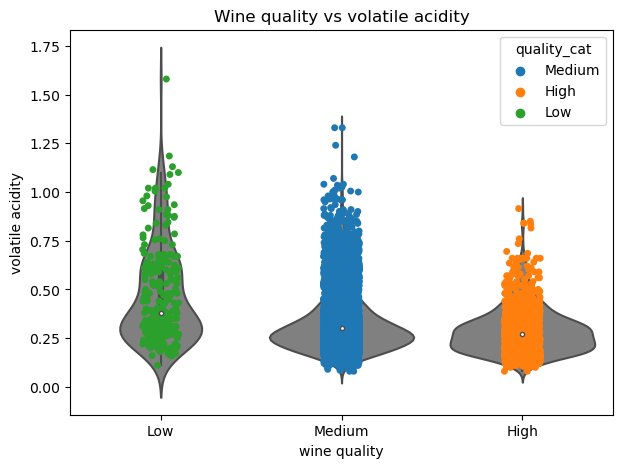

In [22]:
#Violin plot for negative correlation "Wine quality vs volatile acidity":
fig = plt.figure(figsize = (7, 5))
sns.stripplot(data=df_wine, x='quality_cat', y='volatile acidity', hue='quality_cat',order=['Low','Medium','High'])
sns.violinplot(data=df_wine, x='quality_cat', y='volatile acidity', order=['Low','Medium','High'], color='gray')
plt.xlabel("wine quality")
plt.ylabel("volatile acidity")
plt.title("Wine quality vs volatile acidity")
plt.show()

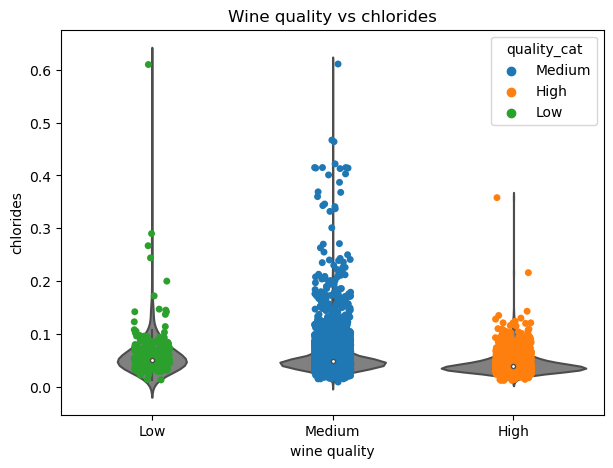

In [23]:
#Violin plot for negative correlation "Wine quality vs chlorides":
fig = plt.figure(figsize = (7, 5))
sns.stripplot(data=df_wine, x='quality_cat', y='chlorides', hue='quality_cat',order=['Low','Medium','High'])
sns.violinplot(data=df_wine, x='quality_cat', y='chlorides', order=['Low','Medium','High'], color='gray')
plt.xlabel("wine quality")
plt.ylabel("chlorides")
plt.title("Wine quality vs chlorides")
plt.show()

**Final Observatios:**
* Higher "alcohol" content (up to 14 degrees) influences a higher quality of wine.
* "Citric acid" has a greater presence in Medium quality wines.
* Medium and low quality wines stand out for their "density". High quality wines has a slightly lower density.
* "volatile acidity" is less present in high quality wines.
* "chlorides" has more presence in Medium quality wine.
* It will be more interesting to analyze wine quality for each category (red wine and white wine).
* If it is necessary to apply a Classification or Regression model, it is recommended to balance the data frame for each type of objective variable (category, quality, etc.) to avoid bias.